In [1]:
import pandas as pd
import numpy as np

Data Cleaning

In [3]:
df = pd.read_csv("countypres_2000-2024.csv")

In [ ]:
df

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,AL GORE,DEMOCRAT,4942,17208,20250821,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993,17208,20250821,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,OTHER,OTHER,113,17208,20250821,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,RALPH NADER,GREEN,160,17208,20250821,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,AL GORE,DEMOCRAT,13997,56480,20250821,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...
94404,2024,WYOMING,WY,WESTON,56045.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3069,3512,20250821,NaN
94405,2024,WYOMING,WY,WESTON,56045.0,US PRESIDENT,KAMALA D HARRIS,DEMOCRAT,378,3512,20250821,NaN
94406,2024,WYOMING,WY,WESTON,56045.0,US PRESIDENT,OTHER,OTHER,18,3512,20250821,NaN
94407,2024,WYOMING,WY,WESTON,56045.0,US PRESIDENT,OVERVOTES,NaN,1,3512,20250821,NaN


In [4]:
df2 = df.copy()

In [5]:
df2['county_name'].isna()

,county_name
0,False
1,False
2,False
3,False
4,False
...,...
94404,False
94405,False
94406,False
94407,False


In [ ]:
df2

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,AL GORE,DEMOCRAT,4942,17208,20250821,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993,17208,20250821,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,OTHER,OTHER,113,17208,20250821,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,RALPH NADER,GREEN,160,17208,20250821,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,AL GORE,DEMOCRAT,13997,56480,20250821,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...
94404,2024,WYOMING,WY,WESTON,56045.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3069,3512,20250821,NaN
94405,2024,WYOMING,WY,WESTON,56045.0,US PRESIDENT,KAMALA D HARRIS,DEMOCRAT,378,3512,20250821,NaN
94406,2024,WYOMING,WY,WESTON,56045.0,US PRESIDENT,OTHER,OTHER,18,3512,20250821,NaN
94407,2024,WYOMING,WY,WESTON,56045.0,US PRESIDENT,OVERVOTES,NaN,1,3512,20250821,NaN


In [128]:
x = df2.groupby(['year', 'candidate', 'state_po', 'party', 'county_fips'])['candidatevotes'].sum()
x = x.reset_index()
y = pd.DataFrame(x)
y.head(3000)

,year,candidate,state_po,party,county_fips,candidatevotes
0,2000,AL GORE,AK,DEMOCRAT,2001.0,1284
1,2000,AL GORE,AK,DEMOCRAT,2002.0,2081
2,2000,AL GORE,AK,DEMOCRAT,2003.0,3693
3,2000,AL GORE,AK,DEMOCRAT,2004.0,2715
4,2000,AL GORE,AK,DEMOCRAT,2005.0,1931
...,...,...,...,...,...,...
2995,2000,AL GORE,WA,DEMOCRAT,53061.0,129612
2996,2000,AL GORE,WA,DEMOCRAT,53063.0,74604
2997,2000,AL GORE,WA,DEMOCRAT,53065.0,5560
2998,2000,AL GORE,WA,DEMOCRAT,53067.0,50467


In [129]:
y['result'] = ' '
y

,year,candidate,state_po,party,county_fips,candidatevotes,result
0,2000,AL GORE,AK,DEMOCRAT,2001.0,1284,
1,2000,AL GORE,AK,DEMOCRAT,2002.0,2081,
2,2000,AL GORE,AK,DEMOCRAT,2003.0,3693,
3,2000,AL GORE,AK,DEMOCRAT,2004.0,2715,
4,2000,AL GORE,AK,DEMOCRAT,2005.0,1931,
...,...,...,...,...,...,...,...
77002,2024,UNDERVOTES,IA,OTHER,19189.0,46,
77003,2024,UNDERVOTES,IA,OTHER,19191.0,162,
77004,2024,UNDERVOTES,IA,OTHER,19193.0,360,
77005,2024,UNDERVOTES,IA,OTHER,19195.0,42,


In [130]:
y_filtered = y[~y.iloc[:, 1].isin(['UNDERVOTES', 'OVERVOTES'])]

In [131]:
y_filtered = y_filtered.reset_index()

In [133]:
y_filtered = y_filtered.drop(columns = ['index'])
y_filtered

,year,candidate,state_po,party,county_fips,candidatevotes,result
0,2000,AL GORE,AK,DEMOCRAT,2001.0,1284,
1,2000,AL GORE,AK,DEMOCRAT,2002.0,2081,
2,2000,AL GORE,AK,DEMOCRAT,2003.0,3693,
3,2000,AL GORE,AK,DEMOCRAT,2004.0,2715,
4,2000,AL GORE,AK,DEMOCRAT,2005.0,1931,
...,...,...,...,...,...,...,...
76774,2024,OTHER,WY,OTHER,56037.0,129,
76775,2024,OTHER,WY,OTHER,56039.0,209,
76776,2024,OTHER,WY,OTHER,56041.0,105,
76777,2024,OTHER,WY,OTHER,56043.0,36,


In [135]:
x = y.groupby(['county_fips', 'state_po', 'year'])['candidatevotes'].max()
x = pd.DataFrame(x)

fina_df = pd.merge(x, y, on = ['county_fips', 'year'])

In [136]:
print(x)

                            candidatevotes
county_fips  state_po year                
1.001000e+03 AL       2000           11993
                      2004           15196
                      2008           17403
                      2012           17379
                      2016           18172
...                                    ...
4.400950e+09 RI       2024             661
4.400952e+09 RI       2024           10145
4.400961e+09 RI       2024            2493
4.400967e+09 RI       2024           10749
4.400977e+09 RI       2024            6653

[22117 rows x 1 columns]


In [137]:
fina_df

,county_fips,year,candidatevotes_x,candidate,state_po,party,candidatevotes_y,result
0,1.001000e+03,2000,11993,AL GORE,AL,DEMOCRAT,4942,
1,1.001000e+03,2000,11993,GEORGE W. BUSH,AL,REPUBLICAN,11993,
2,1.001000e+03,2000,11993,OTHER,AL,OTHER,113,
3,1.001000e+03,2000,11993,RALPH NADER,AL,GREEN,160,
4,1.001000e+03,2004,15196,GEORGE W. BUSH,AL,REPUBLICAN,15196,
...,...,...,...,...,...,...,...,...
77002,4.400967e+09,2024,10749,OTHER,RI,OTHER,482,
77003,4.400977e+09,2024,6653,CHASE OLIVER,RI,LIBERTARIAN,38,
77004,4.400977e+09,2024,6653,DONALD J TRUMP,RI,REPUBLICAN,5664,
77005,4.400977e+09,2024,6653,KAMALA D HARRIS,RI,DEMOCRAT,6653,


In [138]:
fina_df['total_votes_of_winner'] = fina_df['candidatevotes_x']
fina_df['candidatevotes'] = fina_df['candidatevotes_y']

fina_df = fina_df.drop(columns = ['candidatevotes_y', 'candidatevotes_x'])

In [139]:
fina_df

,county_fips,year,candidate,state_po,party,result,total_votes_of_winner,candidatevotes
0,1.001000e+03,2000,AL GORE,AL,DEMOCRAT,,11993,4942
1,1.001000e+03,2000,GEORGE W. BUSH,AL,REPUBLICAN,,11993,11993
2,1.001000e+03,2000,OTHER,AL,OTHER,,11993,113
3,1.001000e+03,2000,RALPH NADER,AL,GREEN,,11993,160
4,1.001000e+03,2004,GEORGE W. BUSH,AL,REPUBLICAN,,15196,15196
...,...,...,...,...,...,...,...,...
77002,4.400967e+09,2024,OTHER,RI,OTHER,,10749,482
77003,4.400977e+09,2024,CHASE OLIVER,RI,LIBERTARIAN,,6653,38
77004,4.400977e+09,2024,DONALD J TRUMP,RI,REPUBLICAN,,6653,5664
77005,4.400977e+09,2024,KAMALA D HARRIS,RI,DEMOCRAT,,6653,6653


In [243]:
fina_df['result'] = (fina_df['total_votes_of_winner'] == fina_df['candidatevotes']).astype(int)

In [245]:
final_df = fina_df.drop(columns = 'total_votes_of_winner')

In [247]:
final_df

,county_fips,year,candidate,state_po,party,result,candidatevotes
0,1.001000e+03,2000,AL GORE,AL,DEMOCRAT,0,4942
1,1.001000e+03,2000,GEORGE W. BUSH,AL,REPUBLICAN,1,11993
2,1.001000e+03,2000,OTHER,AL,OTHER,0,113
3,1.001000e+03,2000,RALPH NADER,AL,GREEN,0,160
4,1.001000e+03,2004,GEORGE W. BUSH,AL,REPUBLICAN,1,15196
...,...,...,...,...,...,...,...
77002,4.400967e+09,2024,OTHER,RI,OTHER,0,482
77003,4.400977e+09,2024,CHASE OLIVER,RI,LIBERTARIAN,0,38
77004,4.400977e+09,2024,DONALD J TRUMP,RI,REPUBLICAN,0,5664
77005,4.400977e+09,2024,KAMALA D HARRIS,RI,DEMOCRAT,1,6653


In [142]:
test_df = final_df.copy()

In [143]:
test_df = test_df.drop(columns = 'candidatevotes')

In [144]:
test_df

,county_fips,year,candidate,state_po,party,result
0,1.001000e+03,2000,AL GORE,AL,DEMOCRAT,0
1,1.001000e+03,2000,GEORGE W. BUSH,AL,REPUBLICAN,1
2,1.001000e+03,2000,OTHER,AL,OTHER,0
3,1.001000e+03,2000,RALPH NADER,AL,GREEN,0
4,1.001000e+03,2004,GEORGE W. BUSH,AL,REPUBLICAN,1
...,...,...,...,...,...,...
77002,4.400967e+09,2024,OTHER,RI,OTHER,0
77003,4.400977e+09,2024,CHASE OLIVER,RI,LIBERTARIAN,0
77004,4.400977e+09,2024,DONALD J TRUMP,RI,REPUBLICAN,0
77005,4.400977e+09,2024,KAMALA D HARRIS,RI,DEMOCRAT,1


Data Analysis

In [249]:
states = final_df.groupby(['year', 'state_po', 'candidate', 'party'])['candidatevotes'].sum()
states = pd.DataFrame(states)
states = states.reset_index()

In [250]:
years = final_df.groupby(['year', 'candidate', 'party'])['candidatevotes'].sum()
years = pd.DataFrame(years)
years = years.reset_index()

In [251]:
import matplotlib.pyplot as plt
import numpy as np

In [252]:
years_dict = {2000:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0.05, 0, 0, 0]},
              2004:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0.05, 0, 0]},
              2008:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0.05, 0, 0]},
              2012:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0.05, 0, 0]},
              2016:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0, 0.05, 0]},
              2020:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0, 0, 0.05, 0, 0]},
              2024:{"candidates":[], "parties":[], "votes":[], "colors":[], "explode":[0, 0.05, 0, 0]}}

for i, row in years.iterrows():
  for x in years_dict:
    if row[0] == x and (row[1] != "OVERVOTES" and row[1] != "UNDERVOTES"):
      years_dict[x]["candidates"].append(row[1])
      years_dict[x]["parties"].append(row[2])
      years_dict[x]["votes"].append(row[3])
      if row[2] == "DEMOCRAT":
        years_dict[x]["colors"].append("CornflowerBlue")
      elif row[2] == "REPUBLICAN":
        years_dict[x]["colors"].append("Crimson")
      elif row[2] == "GREEN":
        years_dict[x]["colors"].append("DarkGreen")
      elif row[2] == "LIBERTARIAN":
        years_dict[x]["colors"].append("DarkGray")
      else:
        years_dict[x]["colors"].append("BurlyWood")

/tmp/ipython-input-3817482385.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] == x and (row[1] != "OVERVOTES" and row[1] != "UNDERVOTES"):
/tmp/ipython-input-3817482385.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  years_dict[x]["candidates"].append(row[1])
/tmp/ipython-input-3817482385.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  years_dict[x]["parties"].append(row[2])
/tmp/ipython-input-3817482385.py:

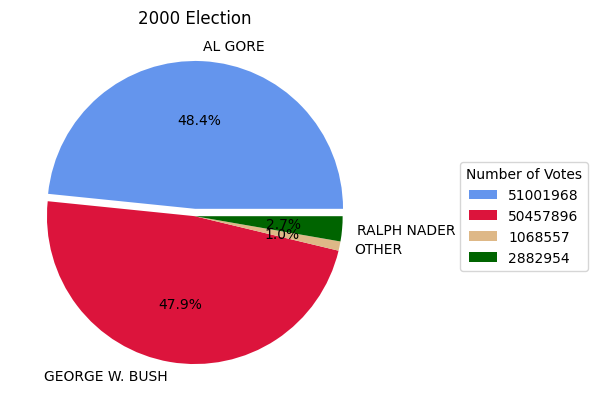

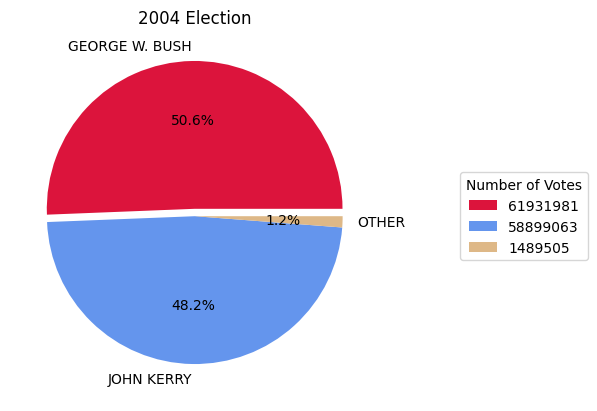

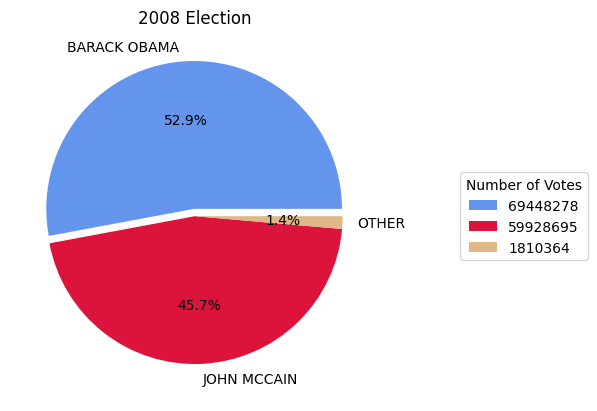

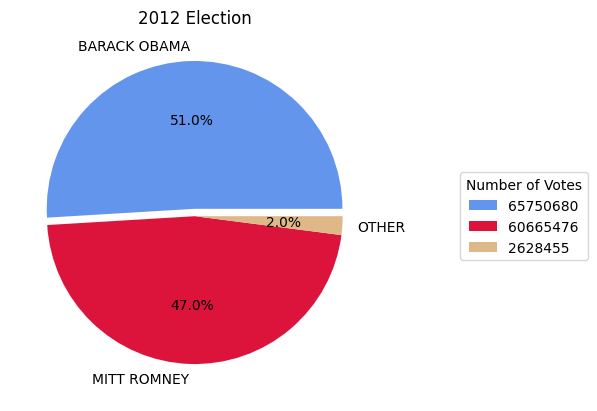

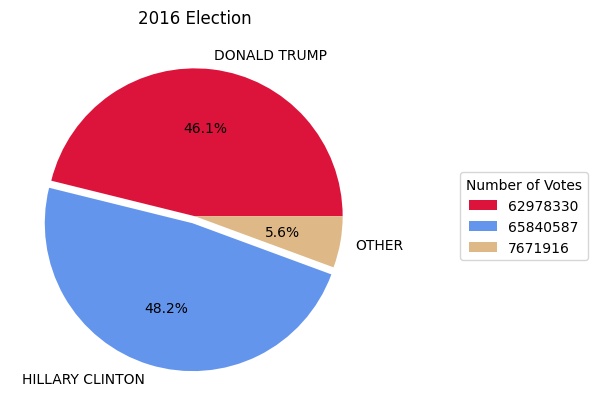

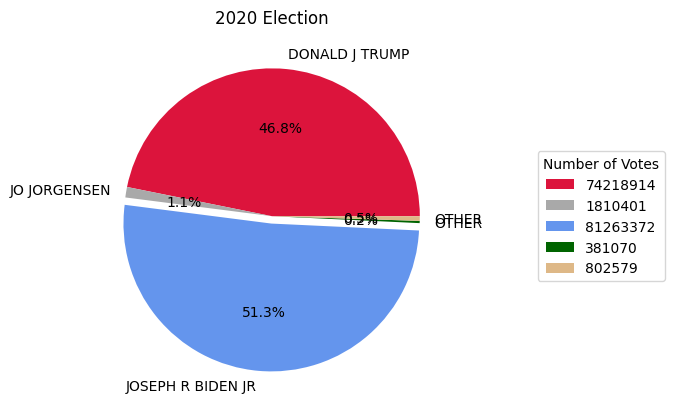

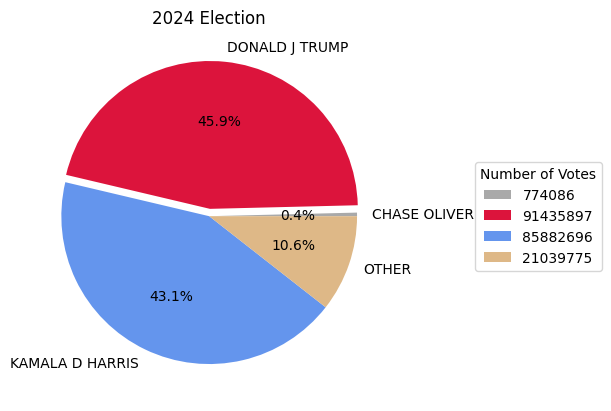

In [253]:
for x in years_dict:
  fig, ax = plt.subplots()
  ax.set_title(f"{x} Election")
  ax.pie(years_dict[x]["votes"],
         labels= years_dict[x]["candidates"],
         colors=years_dict[x]["colors"],
         explode=years_dict[x]["explode"],
         autopct='%1.1f%%')
  # ax.legend(years_dict[x]["parties"],
  #           title = "Parties",
  #           loc="center left",
  #           bbox_to_anchor=(1.5, 0, 0.5, 1))
  ax.legend(years_dict[x]["votes"],
            title="Number of Votes",
            loc="center left",
            bbox_to_anchor=(1.2, 0, 0.5, 1))
  plt.show()

Data Pre-processing

In [145]:
test_df = pd.get_dummies(test_df, columns = ['party'], dtype = int)

In [146]:
test_df = pd.get_dummies(test_df, columns = ['state_po'], dtype = int)

In [147]:
test_df = pd.get_dummies(test_df, columns = ['candidate'], dtype = int)

In [148]:
test_df['year'] = test_df['year'].astype(int)
test_df['county_fips'] = test_df['county_fips'].astype(int)

In [149]:
test_df

,county_fips,year,result,party_DEMOCRAT,party_GREEN,party_LIBERTARIAN,party_OTHER,party_REPUBLICAN,state_po_AK,state_po_AL,...,candidate_JO JORGENSEN,candidate_JOHN KERRY,candidate_JOHN MCCAIN,candidate_JOSEPH R BIDEN JR,candidate_KAMALA D HARRIS,candidate_MITT ROMNEY,candidate_OTHER,candidate_OVERVOTES,candidate_RALPH NADER,candidate_UNDERVOTES
0,1001,2000,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1001,2000,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1001,2000,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1001,2000,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1001,2004,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77002,4400967460,2024,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
77003,4400977000,2024,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77004,4400977000,2024,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
77005,4400977000,2024,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [150]:
model_voter_data = test_df

In [ ]:
y.query("`year` == 2020 & `county_name` == 'APACHE' & `candidate` == 'DONALD J TRUMP'")

,year,candidate,party,county_name,candidatevotes
29675,2020,DONALD J TRUMP,REPUBLICAN,APACHE,11442


Data Modeling

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [158]:
model_voter_data2X = model_voter_data.drop(columns = ['result', 'year', 'county_fips'])

In [164]:
model_voter_data2y = model_voter_data[['result', 'year', 'county_fips']]

In [197]:
model_voter_data2y_df = pd.DataFrame(model_voter_data2y)
model_voter_data2X_df = pd.DataFrame(model_voter_data2X)

PCA

In [198]:
model_voter_data_pca = model_voter_data2X_df.join(model_voter_data2y_df, how = "inner")

In [248]:
model_voter_data_pca

,0,1,2,3,4,5,6,7,result,year,county_fips
0,-0.481356,0.748701,-0.157611,-0.021805,0.000270,-0.070857,-0.335255,0.012538,0,2000,1001
1,-0.556558,-0.815021,-0.205847,-0.042920,-0.706723,-0.067330,0.013976,0.363371,1,2000,1001
2,1.095476,-0.021761,-0.111413,-0.060261,0.000268,-0.072412,0.001381,0.001439,0,2000,1001
3,-0.159940,0.017292,0.626288,1.280421,0.001740,-0.140258,0.053964,0.037412,0,2000,1001
4,-0.556558,-0.815021,-0.205847,-0.042920,-0.706723,-0.067330,0.013976,0.363371,1,2004,1001
...,...,...,...,...,...,...,...,...,...,...,...
77002,1.095170,-0.021793,-0.100475,-0.062653,0.004262,-0.056264,0.000124,0.005636,0,2024,4400967460
77003,-0.206217,0.020310,1.179612,-0.488814,0.004751,-0.045628,0.033470,0.033436,0,2024,4400977000
77004,-0.557438,-0.816372,-0.196183,-0.046252,0.711449,-0.046491,0.012305,0.361239,0,2024,4400977000
77005,-0.482127,0.749750,-0.147281,-0.024367,0.004309,-0.055356,-0.341847,0.017197,1,2024,4400977000


In [169]:
model_voter_data_pca.columns = model_voter_data_pca.columns.astype(str)

In [170]:
condition1 = model_voter_data_pca['year'] <= 2020
model_voter_data_2020 = model_voter_data_pca[condition1]
condition2 = model_voter_data_pca['year'] == 2024
model_voter_data_2024 = model_voter_data_pca[condition2]

In [199]:
X_train = model_voter_data_2020.drop(columns = 'result')
X_test = model_voter_data_2024.drop(columns = 'result')
y_train = model_voter_data_2020['result']
y_test = model_voter_data_2024['result']

In [211]:
pca = PCA()

In [212]:
param_grid_pca = {'n_components': range(1, 25)}

In [213]:
grid_search_pca = GridSearchCV(pca, param_grid_pca, cv = 5)

In [214]:
grid_search_pca.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
70 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/decomposition/_pca.py", line 442, in fit
    self._fit(X)
  File "/usr/l

GridSearchCV(cv=5, estimator=PCA(), param_grid={'n_components': range(1, 25)})

In [215]:
pca = PCA(n_components = 7)
model_voter_data2X = pca.fit_transform(model_voter_data2X)

LR

In [216]:
clf = LogisticRegression(max_iter = 5000, random_state = 0).fit(X_train, y_train)

In [174]:
y_pred = clf.predict(X_test)

In [175]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      9690
           1       0.77      0.80      0.78      3189

    accuracy                           0.89     12879
   macro avg       0.85      0.86      0.86     12879
weighted avg       0.89      0.89      0.89     12879



In [176]:
acc = accuracy_score(y_test, y_pred)
acc

0.8909853249475891

In [177]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [178]:
neigh = KNeighborsClassifier(n_neighbors = 10)

In [191]:
param_grid = {'n_neighbors': range(1, 31)}

In [180]:
grid_search = GridSearchCV(neigh, param_grid, cv = 5, scoring = 'accuracy') # 5-fold cross-validation, using accuracy as scoring metric

In [181]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')

In [182]:
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_knn_model = grid_search.best_estimator_
print("Best n_neighbors: ", best_n_neighbors)
print("Best cross-validation score: ", grid_search.best_score_)

Best n_neighbors:  30
Best cross-validation score:  0.5229222452322569


In [222]:
neigh = KNeighborsClassifier(n_neighbors = 30)

In [223]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [224]:
y_pred_neigh = neigh.predict(X_test)

In [225]:
print(classification_report(y_test, y_pred_neigh))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      9690
           1       0.25      0.00      0.00      3189

    accuracy                           0.75     12879
   macro avg       0.50      0.50      0.43     12879
weighted avg       0.63      0.75      0.65     12879



In [218]:
acc = accuracy_score(y_test, y_pred_neigh)
acc

0.752232316173616

In [217]:
from sklearn.ensemble import RandomForestClassifier

In [219]:
clf_tree = RandomForestClassifier(random_state=0)
clf_tree.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [220]:
y_pred_tree = clf_tree.predict(X_test)

In [221]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9690
           1       0.92      0.79      0.85      3189

    accuracy                           0.93     12879
   macro avg       0.92      0.88      0.90     12879
weighted avg       0.93      0.93      0.93     12879



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


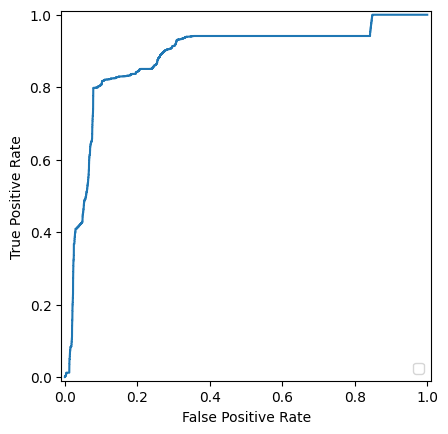

In [226]:
from sklearn.metrics import RocCurveDisplay, roc_curve

y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [230]:
from sklearn.metrics import roc_auc_score

y_pred_proba = clf_tree.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_proba[:,1]))

0.9372345954440267


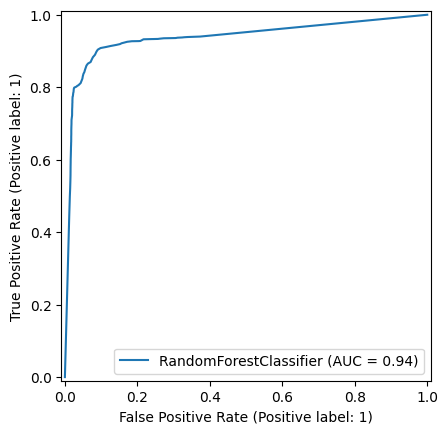

In [233]:
clf_tree_disp = RocCurveDisplay.from_estimator(clf_tree, X_test, y_test)
plt.show()

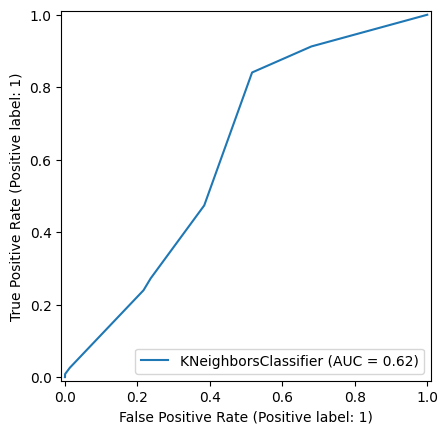

In [234]:
neigh_tree_disp = RocCurveDisplay.from_estimator(neigh, X_test, y_test)
plt.show()

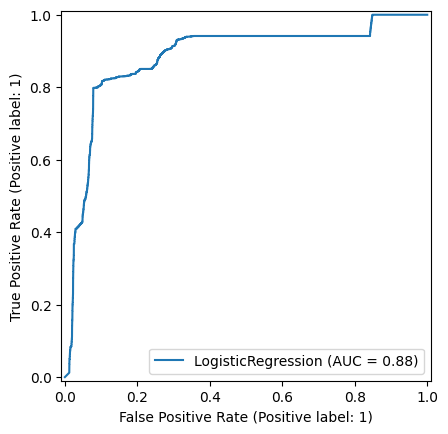

In [235]:
clf_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

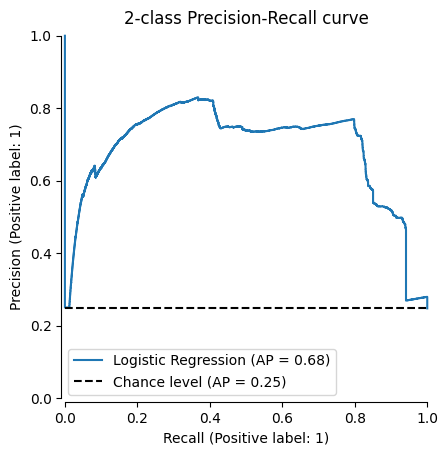

In [239]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name = "Logistic Regression", plot_chance_level=True, despine=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

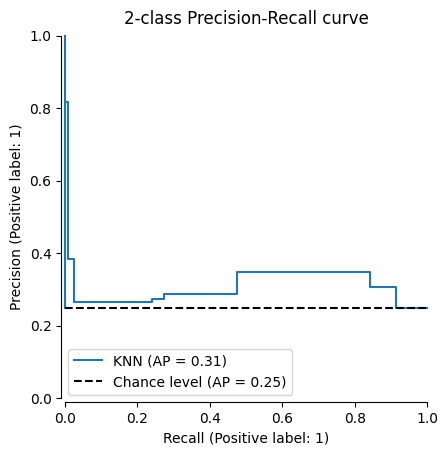

In [241]:
display = PrecisionRecallDisplay.from_estimator(
    neigh, X_test, y_test, name = "KNN", plot_chance_level=True, despine=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

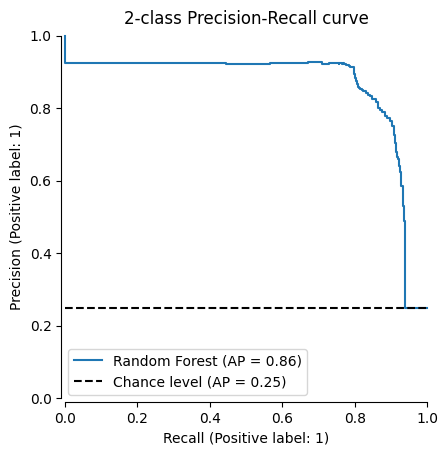

In [242]:
display = PrecisionRecallDisplay.from_estimator(
    clf_tree, X_test, y_test, name = "Random Forest", plot_chance_level=True, despine=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")